In [2]:
"""
Class 7. Introduction to Machine Learning

Linear regression: predicts numbers from features
"""

import pandas as pd
import seaborn as sns

In [3]:
import os

ROOT_DIR = "C:\\Users\\Loccha kakko\\PyCharmMiscProject\\"
DATA_DIR = os.path.join(ROOT_DIR, "data")

print(ROOT_DIR)
print(DATA_DIR)

E:\ML\
E:\ML\data


In [3]:
dataset_file = os.path.join(
    DATA_DIR, 
    "housing_single_feature.csv"
)

print(dataset_file)

E:\PyCharmProjects\pythonProject\data\housing_single_feature.csv


In [4]:
house_df = pd.read_csv("housing_single_feature (1).csv")
house_df.head()

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000


In [6]:
import numpy as np

# Parameter and bias are generally termed as weights

# Step 1. Weight initialization
per_sft_price = np.random.randint(1, 1000000)
registration_cost = np.random.randint(1, 1000000)

print(per_sft_price)
print(registration_cost)

# Step 2. Define the ML Algorithm
def get_house_price(area, per_sft_price, registration_cost):
    estimated_price = per_sft_price * area + registration_cost
    return estimated_price

estimated_price = get_house_price(
    area=7420,
    per_sft_price=per_sft_price,
    registration_cost=registration_cost,
)

print("estimated_price",estimated_price)

493807
360843
estimated_price 3664408783


In [7]:
# Step 3. Predict the result
house_df['estimated_price'] = [ 
    get_house_price(area, per_sft_price, registration_cost) for area in house_df['area']
]

house_df.head()

,area,price,estimated_price
0,7420,13300000,3664408783
1,8960,12250000,4424871563
2,9960,12250000,4918678563
3,7500,12215000,3703913343
4,7420,11410000,3664408783


In [8]:
x = []
y = []
y_type = []

for i in range(len(house_df)):
    x.append(house_df.iloc[i]["area"])
    y.append(house_df.iloc[i]["price"])
    y_type.append("y_true")
    
    x.append(house_df.iloc[i]["area"])
    y.append(house_df.iloc[i]["estimated_price"])
    y_type.append("y_pred")
    
house_df = pd.DataFrame({
    "area": np.array(x),
    "price": np.array(y),
    "type": np.array(y_type)
})

print(len(house_df))
house_df.head()

1090


,area,price,type
0,7420,13300000,y_true
1,7420,3664408783,y_pred
2,8960,12250000,y_true
3,8960,4424871563,y_pred
4,9960,12250000,y_true


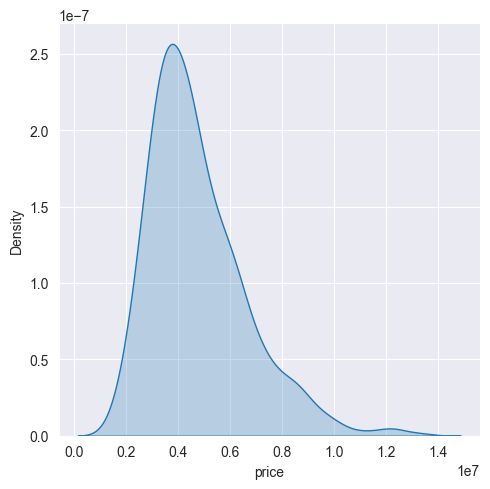

In [13]:
""" Probability Distribution Function (PDF) for actual house price given in the dataset """
sns.displot(
    data=house_df.query("type == 'y_true'"),
    x="price",
    kind='kde',
    fill=True,

)

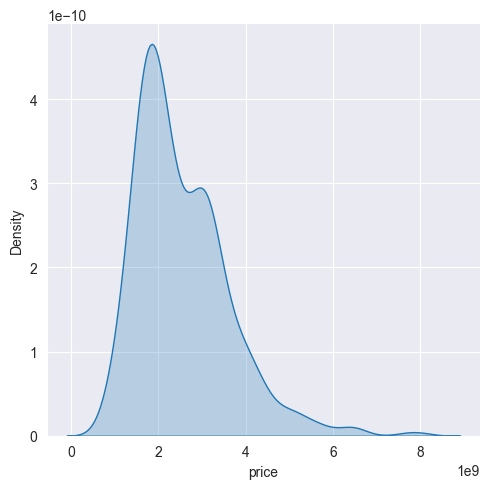

In [14]:
sns.displot(
    data=house_df.query("type == 'y_pred'"),
    x="price",
    kind='kde',
    fill=True,
)

In [15]:
from scipy.stats import entropy

def calculate_kl_divergence(df, epsilon=1e-10, max_divergence=1e6):
    y_pred = df[df["type"] == "y_pred"]["price"].values
    y_true = df[df["type"] == "y_true"]["price"].values
    
    y_pred_prob = y_pred / np.sum(y_pred)
    y_true_prob = y_true / np.sum(y_true)
    
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1)
    y_true_prob = np.clip(y_true_prob, epsilon, 1)
    
    kl_div = entropy(y_true_prob, y_pred_prob)
    
    if np.isinf(kl_div):
        kl_div = max_divergence
    
    return kl_div

kl_divergence = calculate_kl_divergence(house_df)
print(f"KL Divergence: {kl_divergence}")

KL Divergence: 0.06382493288817197


In [ ]:
"""
Find the distribution dissimilarities between y_true_PDF and y_pred_PDF

KL Divergence = D(y_true_PDF || y_pred_PDF)

Objective of any Machine Learning
---------------------------------

- Increase Maximum likelihood estimation
- Reduce dissimilarity between distributions (predicted vs true) 
- Reduce KL divergence
- Minimize some error / loss / cost objective function
"""